### NLP, EDA and Models

### Imports 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import skimpy as skim
import matplotlib.ticker as ticker

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from matplotlib.colors import LinearSegmentedColormap
from wordcloud import WordCloud
import unicodedata
import nltk
import re
import string
import spacy 


<!-- Data Cleaning and EDA

Are missing values imputed/handled appropriately?
Are distributions examined and described?
Are outliers identified and addressed?
Are appropriate summary statistics provided?
Are steps taken during data cleaning and EDA framed appropriately?
Does the student address whether or not they are likely to be able to answer their problem statement 
with the provided data given what they've discovered during EDA?

Is text data successfully converted to a matrix representation?
Are methods such as stop words, stemming, and lemmatization explored?
Does the student properly split and/or sample the data for validation/training purposes?
Does the student test and evaluate a variety of models to identify a production algorithm (AT MINIMUM: Bayes and one other model)?
Does the student defend their choice of production model relevant to the data at hand and the problem?
Does the student explain how the model works and evaluate its performance successes/downfalls? -->

Table:
1) Preliminary NLP Analysis / EDA
2) Modeling
   - Grid search
   - Results


My goal is to create a model that predicts which words come from a particular subreddit, specifically Korean skincare or Skincare Addiction, and gain insight into my problem question: what characteristics make K-beauty unique compared to American skincare? 

### Import combined subreddits, skincare adddiction reddit and korean skincare reddit.

In [2]:
skincare = pd.read_csv('data/skincare.csv')
k_skin = pd.read_csv('data/koreanskincarereddit.csv')
skin_add = pd.read_csv('data/skincareaddiction.csv')

Importing data from cleaning notebook. Will continue some cleaning here as well throughout NLP process.

In [3]:
skincare.shape

(2014, 4)

In [4]:
skincare.isnull().sum()

created_utc    0
title          0
self_text      0
subreddit      0
dtype: int64

In [5]:
k_skin.shape

(1780, 4)

In [6]:
skin_add.shape

(1492, 4)

### Preliminary NLP Analysis / EDA

In [7]:
X = skincare['self_text']
y = skincare['subreddit']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

Train, test, split of my column "self_text" which is posts and predicting my column "subreddit".m

In [8]:
skincare.head(5)

,created_utc,title,self_text,subreddit
0,1.713098e+09,Breakouts after koren skincare products:help m...,"Hey everyone,\nI’m using this new skincare pro...",koreanskincare
1,1.713094e+09,skincare product recs ?,"i have dry, sensitive, congested skin\ni have ...",koreanskincare
2,1.713074e+09,Difference between Skin1004 Centella Ampoule a...,Hello guys!\n\nI wanted to ask if any of you k...,koreanskincare
3,1.713063e+09,Adding new product in the routine!,"Pic 1 : wow, the packing looks really good. I ...",koreanskincare
4,1.713045e+09,Idk where to begin please help!,I am trying to make the switch to kskincare an...,koreanskincare


In [9]:
def tokenizer(sentence):
    return nltk.word_tokenize(sentence)

cvect_tokenized = CountVectorizer(tokenizer=tokenizer, max_features=500)
X_train_tokenized = cvect_tokenized.fit_transform(X_train)
X_test_tokenized = cvect_tokenized.transform(X_test)
feature_names_tokenized = cvect_tokenized.get_feature_names_out()

# Lemmatization
nlp = spacy.load('en_core_web_sm')
def lemmatizer(sentence):
    doc = nlp(sentence)
    return [word.lemma_ for word in doc]

cvect_lemmatized = CountVectorizer(tokenizer=lemmatizer, max_features=500)
X_train_lemmatized = cvect_lemmatized.fit_transform(X_train)
X_test_lemmatized = cvect_lemmatized.transform(X_test)
feature_names_lemmatized = cvect_lemmatized.get_feature_names_out()

/opt/anaconda3/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


I am interested in using Tokenization and lemmatization to help predict my skincare text data. This function will help me create a Tokenized variable and a Lemmatized variable that is Count Vectorized.

In [10]:
feature_names_tokenized[:15]

array(['!', '#', '%', '&', "''", "'d", "'m", "'s", "'ve", '(', ')', '*',
       '+', ',', '-'], dtype=object)

Shows what is currently the top 15 most frequent instances of text data in tokenized words.

In [11]:
feature_names_lemmatized[:15]

array(['\n', '\n\n', '\n\n\n', ' ', ' \n', ' \n\n', '!', '"', '#', '%',
       '&', "'", "'s", '(', ')'], dtype=object)

Shows what is currently the top 15 most frequent instances of text data in lemmatized words.

From both results, there are line breaks, characters, letters, punctuations that need to be cleaned. 

In [12]:
def clean_feature_names(feature_names):

    cleaned_names = [re.sub(r'\W+', '', name) for name in feature_names]
    

    cleaned_names = [re.sub(r'\d+', '', name) for name in cleaned_names]
    

    cleaned_names = [name for name in cleaned_names if len(name) > 1]
    
    return cleaned_names


cleaned_tokenized_names = clean_feature_names(feature_names_tokenized)

cleaned_lemmatized_names = clean_feature_names(feature_names_lemmatized)

I created a function that cleans the data by removing linebreaks, characters, and numbers from the feature names feature_names_lemmatized and feature_names_tokenized. Then, I saved the data as cleaned_tokenized_names and cleaned_lemmatized_names.

In [13]:
print("Cleaned Tokenized Feature Names:")
for name in cleaned_tokenized_names:
    print(name)

Cleaned Tokenized Feature Names:
ve
about
acid
acne
actually
add
advance
advice
after
again
age
ago
aha
all
almost
already
also
always
am
amazing
amazon
ampoule
an
and
anua
any
anyone
anything
apply
appreciate
appreciated
are
area
around
as
at
away
back
bad
balm
barrier
based
be
beauty
because
been
before
being
best
better
between
bha
bit
black
blackheads
body
boj
both
bottle
bought
brand
brands
break
breakouts
bumps
but
buy
by
ca
can
care
cause
centella
cerave
cetaphil
change
cheeks
chin
clean
cleanse
cleanser
cleansing
clear
combination
combo
come
control
cosrx
could
couple
cream
current
currently
daily
dark
day
days
decided
deep
did
didn
difference
different
do
does
doesn
doing
don
done
dont
double
down
dry
due
during
either
else
enough
especially
essence
etc
even
ever
every
everyone
everything
exfoliating
experience
extract
eye
eyes
face
facial
far
feel
feeling
feels
few
find
fine
first
foam
foaming
for
forehead
found
free
from
gel
gentle
get
gets
getting
give
glow
glycolic
go
goin

Checking to see the impact of words tokenized.

In [14]:
print("Cleaned Lemmatized Feature Names:")
for name in cleaned_lemmatized_names:
    print(name)

Cleaned Lemmatized Feature Names:
about
acid
acne
active
actually
add
advance
advice
after
again
age
ago
aha
all
almost
already
also
always
am
amazing
amazon
ampoule
an
and
anua
any
anyone
anything
apply
appreciate
area
around
as
ask
at
away
back
bad
balm
barrier
base
be
beauty
because
become
before
between
bha
big
bit
black
blackhead
blemish
body
boj
both
bottle
brand
break
breakout
bump
burn
but
buy
by
calm
can
care
cause
centella
cerave
cetaphil
change
cheap
cheek
chemical
chin
choice
clean
cleanse
cleanser
cleansing
clear
clog
combination
combo
come
concern
control
cosrx
could
couple
cream
current
currently
daily
damage
dark
day
decide
deep
definitely
dermatologist
difference
different
do
double
down
dry
due
during
easily
either
else
end
enough
especially
essence
etc
even
evening
ever
every
everyone
everything
exfoliate
experience
extract
eye
face
facial
far
feel
few
figure
find
fine
first
fix
foam
foaming
follow
for
forehead
free
from
gel
gentle
get
give
glow
glycolic
go
good
grea

Checking to see the impact of words lemmatized.

In [15]:
#pip install wordcloud

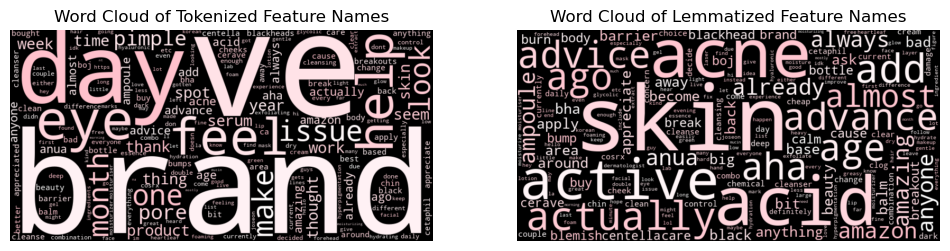

In [16]:
custom_cmap = LinearSegmentedColormap.from_list('custom', ['white', 'pink'])

tokenized_wordcloud = WordCloud(width=800, height=400, colormap=custom_cmap).generate(' '.join(cleaned_tokenized_names))

if cleaned_lemmatized_names:
    lemmatized_wordcloud = WordCloud(width=800, height=400, colormap=custom_cmap).generate(' '.join(cleaned_lemmatized_names))
else:
    lemmatized_wordcloud = None

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(tokenized_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Tokenized Feature Names')

if lemmatized_wordcloud:
    plt.subplot(1, 2, 2)
    plt.imshow(lemmatized_wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud of Lemmatized Feature Names')

plt.show()

To gauge whether or not I should implement tokenization, v.s lemmatization, or both, I created a word cloud to see its current impact on the text data and assess if it would be appropriate for the analysis. After understanding its impact on the words, I have decided that moving forward, an important part of the text data is exploring skincare brands that often have more than one word and should not be reduced to their base or changed to tokens. For this reason, I will not use tokenization or lemmatization; instead, I will use TFDIF and Count vectorizer to better deal with the diversity in the words, bigrams, and trigrams this particular data contains. 

For record purposes: 

feature_names_tokenized, cleaned_tokenized_names: Contains set of 500 features tokenized and also a cleaned version which could be used for other modeling purposes in the future.

feature_names_lemmatized, cleaned_lemmatized_names: Contains set of 500 features lemmatized and also a cleaned version which could be used for other modeling purposes in the future.

In [17]:
#Count vectorizing data (non tokenization or lemmatization)
cvect = CountVectorizer(stop_words='english', lowercase=False)

X_train_vect = cvect.fit_transform(X_train)

X_test_vect = cvect.transform(X_test)

In [18]:
type(X_train_vect)
type(X_test_vect)

scipy.sparse._csr.csr_matrix

In [19]:
doc_term = pd.DataFrame(X_train_vect.toarray(), columns=cvect.get_feature_names_out())
doc_term.head(3)

,00,000,01,025,0373,04,05,08,08a6e3227144d615ec3bae39bbc748b5dce6ab32,10,...,znmbxez0z6qc1,zo,zone,zoomed,zotriazoly,ánd,제조업자,책임판매업자,화장품제조업자,화장품책임판매업자
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Count vectorized data and noticed that the data was not cleaned from previously because it was only to the lemmatized and tokenized data.

In [21]:
def is_latin(characters):
    try:
        name = unicodedata.name(characters)
        if name.startswith('HANGUL') or name.startswith('HANGUL'):
            return False
        else:
            return characters.isalpha()
    except (TypeError, ValueError):
        return False

def filter_korean(text):
    return ''.join(characters for characters in text if is_latin(characters))

def clean_feature_names(feature_names):
    cleaned_names = [re.sub(r'\W+', '', name) for name in feature_names]
    cleaned_names = [re.sub(r'\d+', '', name) for name in cleaned_names]
    cleaned_names = [name for name in cleaned_names if len(name) > 1]
    return cleaned_names

cvect = CountVectorizer(stop_words='english', lowercase=False)

X_train_vect = cvect.fit_transform(X_train)


X_test_vect = cvect.transform(X_test)


doc_term = pd.DataFrame(X_train_vect.toarray(), columns=cvect.get_feature_names_out())


filtered_feature_names = [filter_korean(name) for name in doc_term.columns]


cleaned_feature_names = clean_feature_names(filtered_feature_names)


doc_term_filtered = doc_term[doc_term.columns.intersection(cleaned_feature_names)]


doc_term_cleaned = doc_term_filtered.fillna('no_text')


doc_term_cleaned.head(3)

,AA,AB,ABOUT,AC,ACNE,ADHD,ADVANCE,ADVICE,AFTERCARE,AGAIN,...,yummy,zero,zinc,zit,zits,zo,zone,zoomed,zotriazoly,ánd
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


I created a function that filters Korean text and cleans the data similarly to other token and lemmatized data, then I count vectorized it.

In [32]:
doc_term_cleaned = doc_term_cleaned.dropna()

In [33]:
doc_term_cleaned = doc_term_cleaned.reset_index(drop=True)

In [58]:
doc_term_cleaned.head()

,AA,AB,ABOUT,AC,ACNE,ADHD,ADVANCE,ADVICE,AFTERCARE,AGAIN,...,yummy,zero,zinc,zit,zits,zo,zone,zoomed,zotriazoly,ánd
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
doc_term_cleaned.isnull().sum()

AA            0
AB            0
ABOUT         0
AC            0
ACNE          0
             ..
zo            0
zone          0
zoomed        0
zotriazoly    0
ánd           0
Length: 8208, dtype: int64

In [57]:
# clean dupes c
doc_term_cleaned.dtypes

AA            int64
AB            int64
ABOUT         int64
AC            int64
ACNE          int64
              ...  
zo            int64
zone          int64
zoomed        int64
zotriazoly    int64
ánd           int64
Length: 8208, dtype: object

In [32]:
X.head(2)

0    Hey everyone,\nI’m using this new skincare pro...
1    i have dry, sensitive, congested skin\ni have ...
Name: self_text, dtype: object

Count Vectorized Text.

In [38]:
doc_term_cleaned.shape

(1510, 8208)

In [39]:
doc_term_cleaned.sum().nlargest(20)

skin        1847
use          737
products     657
ve           584
like         579
acne         565
routine      537
skincare     523
face         518
using        502
just         474
cleanser     429
don          385
know         383
toner        381
really       367
dry          360
help         349
cream        345
serum        341
dtype: int64

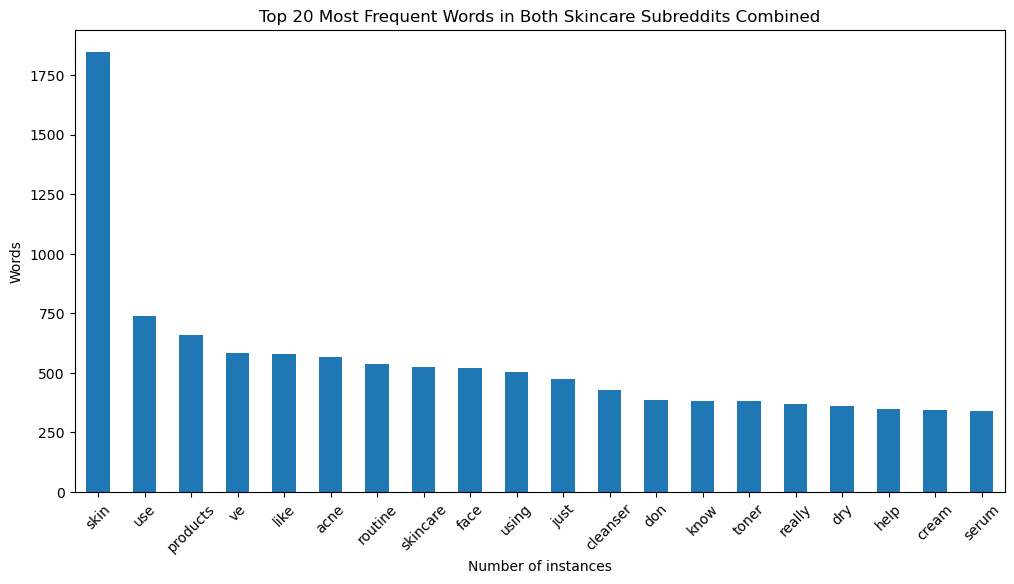

In [64]:
col_sum = doc_term_cleaned.sum()

top_most = col_sum.nlargest(20)

top_most.plot(kind='bar', figsize=(12, 6))


plt.xlabel('Number of instances')
plt.ylabel('Words')
plt.title('Top 20 Most Frequent Words in Both Skincare Subreddits Combined')


plt.xticks(rotation=45)

plt.show()

First bar chart of Top 25 Most Frequent Words in Both Skincare Subreddits. Now I will create one iwth custom stop words.

### Creating Custom stop words

In [70]:
english_stop_words = list(CountVectorizer(stop_words='english').get_stop_words())
custom_stop_words = ['ve', 'just', 'little', 'don', 'pjpg', 'auto', 'webp', 'format', 'https', 'preview', 'redd']

stop_words = english_stop_words + custom_stop_words


cvect_one = CountVectorizer(stop_words=stop_words)


new_stop = cvect_one.fit_transform(X)


feature_names = cvect_one.get_feature_names_out()


skincare_stop = pd.DataFrame(new_stop.toarray(), columns=feature_names)


col_sum = skincare_stop.sum()


top_most = col_sum.nlargest(25)

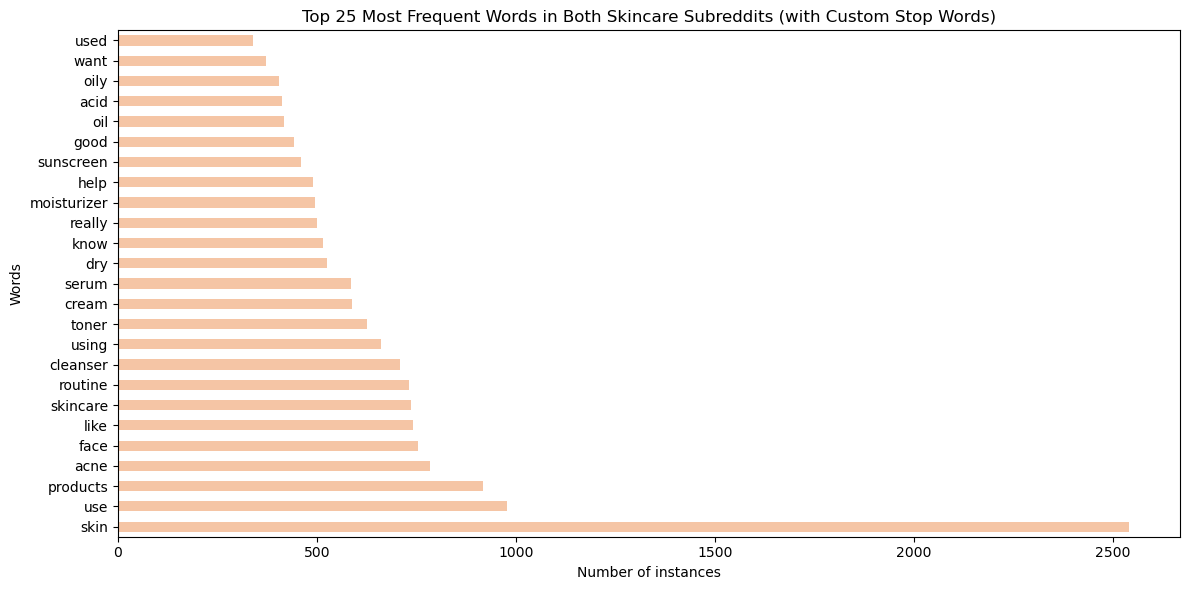

In [72]:
top_most.plot(kind='barh', color='#F5C5A5', figsize=(12, 6))

plt.title('Top 25 Most Frequent Words in Both Skincare Subreddits (with Custom Stop Words)')
plt.xlabel('Number of instances')
plt.ylabel('Words')

plt.tight_layout()

plt.xticks(rotation=0)

plt.tight_layout()

plt.show()

Official chart with stop words.

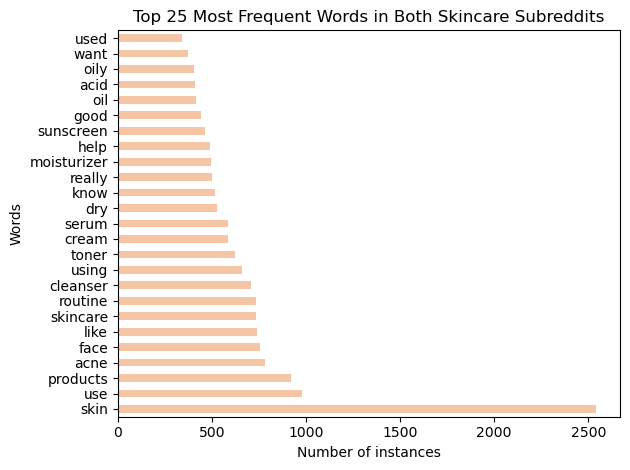

In [58]:
top_features = skincare_stop.sum().sort_values(ascending=False).head(25)
top_features.plot(kind='barh', color='#F5C5A5')

# Add a title and axis labels
plt.title('Top 25 Most Frequent Words in Both Skincare Subreddits')
plt.xlabel('Number of instances')
plt.ylabel('Words')

# Adjust the layout to make the plot more readable
plt.tight_layout()

# Display the plot
plt.show()

First attempt.

## Most Common Bigram in both skincare subreddits

In [59]:
# Count the frequency of bigrams and trigrams
cvec_bi = CountVectorizer(stop_words=list(stop_words), ngram_range=(2, 2))
cvec_bi.fit(X)

x_cvect = cvec_bi.transform(X)

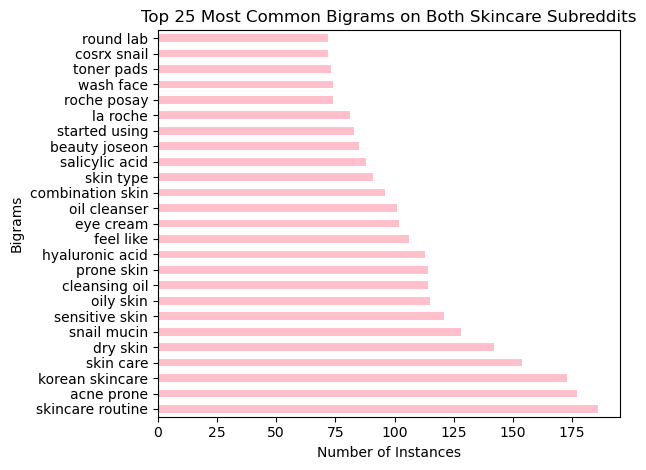

In [67]:
bi_df = pd.DataFrame(x_cvect.todense(), columns=cvec_bi.get_feature_names_out())
bi_df.sum().sort_values(ascending=False).head(25).plot(kind='barh', color='pink')
plt.title('Top 25 Most Common Bigrams on Both Skincare Subreddits')
plt.xlabel('Number of Instances')
plt.ylabel('Bigrams')
plt.tight_layout()
plt.show()

In [32]:
# how to remove pjpg auto webp, format pjpg webp, https preview redd, 

In [68]:
cvec_tri = CountVectorizer(stop_words=list(stop_words), ngram_range=(3, 3))
cvec_tri.fit(X)

CountVectorizer(ngram_range=(3, 3),
                stop_words=['of', 'whereafter', 'not', 'twelve', 'sometimes',
                            'must', 'detail', 'around', 'one', 'what', 'which',
                            'seemed', 'hasnt', 'or', 'full', 'two', 'behind',
                            'down', 'less', 'anyway', 'here', 'four', 'twenty',
                            'therefore', 'eight', 'towards', 'de', 'do', 'side',
                            'above', ...])

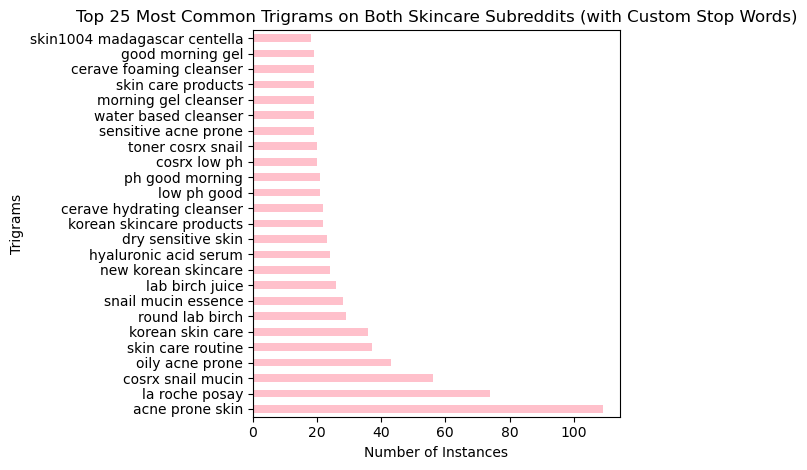

In [69]:
x_cvect = cvec_tri.transform(X)
tri_df = pd.DataFrame(x_cvect.todense(), columns=cvec_tri.get_feature_names_out())
tri_df.sum().sort_values(ascending=False).head(25).plot(kind='barh', color='pink')
plt.title('Top 25 Most Common Trigrams on Both Skincare Subreddits')
plt.xlabel('Number of Instances')
plt.ylabel('Trigrams')
plt.tight_layout()
plt.show()

Most Common Bigram in "Skincare Addiction" subreddit

### Distribution in Skincare subreddits.

In [73]:
doc_term_cleaned.describe()

,AA,AB,ABOUT,AC,ACNE,ADHD,ADVANCE,ADVICE,AFTERCARE,AGAIN,...,yummy,zero,zinc,zit,zits,zo,zone,zoomed,zotriazoly,ánd
count,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,...,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000
mean,0.000662,0.001325,0.000662,0.001325,0.001325,0.000662,0.000662,0.001325,0.000662,0.001325,...,0.000662,0.004636,0.012583,0.001325,0.002649,0.000662,0.027152,0.001325,0.000662,0.000662
std,0.025734,0.036382,0.025734,0.036382,0.051469,0.025734,0.025734,0.036382,0.025734,0.036382,...,0.025734,0.067951,0.142776,0.036382,0.051417,0.025734,0.170538,0.036382,0.025734,0.025734
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000


Finding summary stats from data.

In [74]:
skin_add['title_len'] = [len(i) for i in skin_add['title']]
skin_add['title_words'] = [len(i.split()) for i in skin_add['title']]
skin_add.head()

,created_utc,title,self_text,subreddit,title_len,title_words
0,1.713070e+09,combining two body lotions,I use Cerave body lotion and a retinol body lo...,Skincare_Addiction,26,4
1,1.713069e+09,Is SPF 30 moisturizer enough to use with Retinol?,Is SPF 30 moisturizer enough to use with Retin...,Skincare_Addiction,49,9
2,1.713060e+09,Retinol Eye Cream,\nSo I accidentally bought an eye cream that c...,Skincare_Addiction,17,3
3,1.713059e+09,Question about Niacinamide cleanser + serum,Can I use CeraVe's foaming cleanser (which con...,Skincare_Addiction,43,6
4,1.713058e+09,Tretinoin combined with exfoliants?,Hi! 🩷 please be kind .. I’m sorry if this is a...,Skincare_Addiction,35,4


Using length to from title words and title length of skincare addiction subreddit.

In [75]:
k_skin['title_len'] = [len(i) for i in k_skin['title']]
k_skin['title_words'] = [len(i.split()) for i in k_skin['title']]
k_skin.head()

,created_utc,title,self_text,subreddit,title_len,title_words
0,1.713098e+09,Breakouts after koren skincare products:help m...,"Hey everyone,\nI’m using this new skincare pro...",koreanskincare,72,12
1,1.713094e+09,skincare product recs ?,"i have dry, sensitive, congested skin\ni have ...",koreanskincare,23,4
2,1.713074e+09,Difference between Skin1004 Centella Ampoule a...,Hello guys!\n\nI wanted to ask if any of you k...,koreanskincare,88,12
3,1.713063e+09,Adding new product in the routine!,"Pic 1 : wow, the packing looks really good. I ...",koreanskincare,34,6
4,1.713045e+09,Idk where to begin please help!,I am trying to make the switch to kskincare an...,koreanskincare,31,6


Using length to from title words and title length of korean skincare  subreddit.

Distribution of title length for Skincare Addiction subreddit.

Text(0, 0.5, 'Percentage (%)')

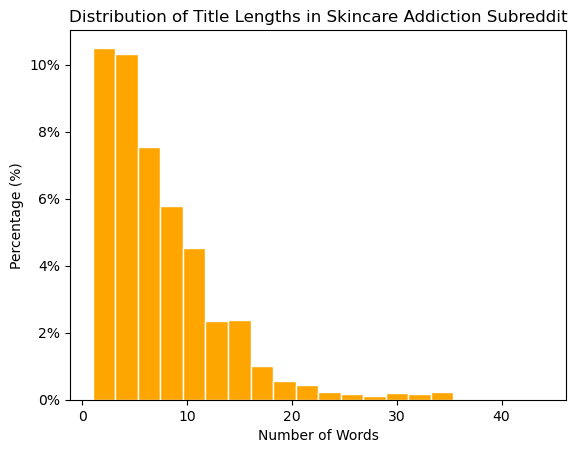

In [39]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:.0%}'.format(x)))
plt.hist(skin_add['title_words'], bins=20, color='#FFA500', edgecolor='white', density=True)
plt.title('Distribution of Title Lengths in Skincare Addiction Subreddit')
plt.xlabel('Number of Words')
plt.ylabel('Percentage (%)')

Distribution of title length for Korean skincare subreddit. Data is skewed to the right.

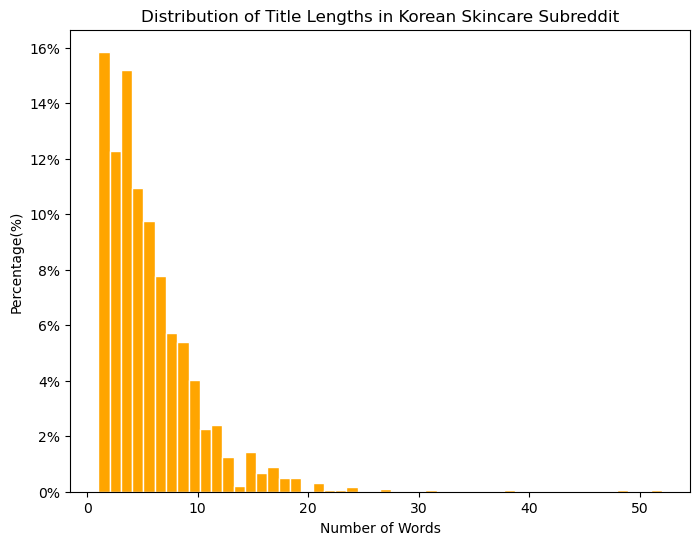

In [76]:
k_skin['title_words'] = [len(i.split()) for i in k_skin['title']]

plt.figure(figsize=(8, 6))
plt.hist(k_skin['title_words'], bins=50, color='orange', edgecolor='white', density=True)
plt.title('Distribution of Title Lengths in Korean Skincare Subreddit')
plt.xlabel('Number of Words')
plt.ylabel('Percentage(%)')

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:.0%}'.format(x)))

plt.show()

In [41]:
k_skin['self_text'] = k_skin['self_text'].fillna('')

k_skin['selftext_len'] = [len(str(i)) for i in k_skin['self_text']]
k_skin['selftext_words'] = [len(str(i).split()) for i in k_skin['self_text']]

k_skin.head()

,created_utc,title,self_text,subreddit,title_len,title_words,selftext_len,selftext_words
0,1.713098e+09,Breakouts after koren skincare products:help m...,"Hey everyone,\nI’m using this new skincare pro...",koreanskincare,72,12,159,28
1,1.713094e+09,skincare product recs ?,"i have dry, sensitive, congested skin\ni have ...",koreanskincare,23,4,236,48
2,1.713074e+09,Difference between Skin1004 Centella Ampoule a...,Hello guys!\n\nI wanted to ask if any of you k...,koreanskincare,88,12,288,54
3,1.713063e+09,Adding new product in the routine!,"Pic 1 : wow, the packing looks really good. I ...",koreanskincare,34,6,645,131
4,1.713045e+09,Idk where to begin please help!,I am trying to make the switch to kskincare an...,koreanskincare,31,6,1103,204


In [105]:
mean_selftext_len = k_skin['selftext_len'].mean()
print(f"The mean of 'selftext_len' is: {mean_selftext_len:.2f}")

mean_selftext_words = k_skin['selftext_words'].mean()
print(f"The mean of 'selftext_words' is: {mean_selftext_words:.2f}")

The mean of 'selftext_len' is: 437.84
The mean of 'selftext_words' is: 79.60


Finding the mean of korean skincare post length and words.

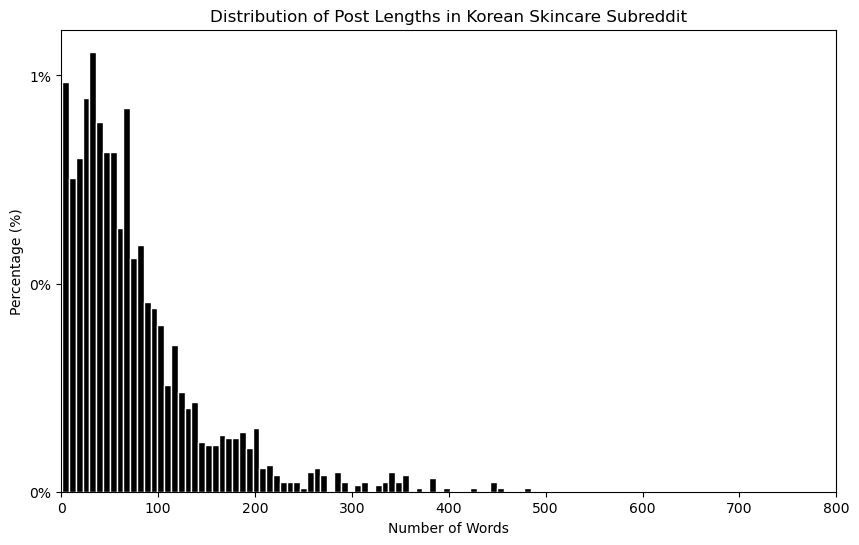

In [80]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

k_skin['selftext_words'] = [len(str(i).split()) for i in k_skin['self_text']]

plt.figure(figsize=(10, 6))
plt.hist(k_skin['selftext_words'], bins=200, color='black', edgecolor='white', density=True)
plt.title('Distribution of Post Lengths in Korean Skincare Subreddit')
plt.xlabel('Number of Words')
plt.ylabel('Percentage (%)')

ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:.0%}'.format(x)))

tick_values = [0, 0.005, 0.01]
ax.set_yticks(tick_values)
ax.set_yticklabels(['{:.0%}'.format(x) for x in tick_values])

ax.set_xlim(0, 800)

plt.show()

Post length of Korean skincare reddit. Data is skewed to the right.

In [81]:
skin_add['self_text'] = skin_add['self_text'].fillna('')

skin_add['selftext_len'] = [len(str(i)) for i in skin_add['self_text']]
skin_add['selftext_words'] = [len(str(i).split()) for i in skin_add['self_text']]

skin_add.head()

,created_utc,title,self_text,subreddit,title_len,title_words,selftext_words,selftext_len
0,1.713070e+09,combining two body lotions,I use Cerave body lotion and a retinol body lo...,Skincare_Addiction,26,4,94,490
1,1.713069e+09,Is SPF 30 moisturizer enough to use with Retinol?,Is SPF 30 moisturizer enough to use with Retin...,Skincare_Addiction,49,9,28,139
2,1.713060e+09,Retinol Eye Cream,\nSo I accidentally bought an eye cream that c...,Skincare_Addiction,17,3,59,302
3,1.713059e+09,Question about Niacinamide cleanser + serum,Can I use CeraVe's foaming cleanser (which con...,Skincare_Addiction,43,6,14,103
4,1.713058e+09,Tretinoin combined with exfoliants?,Hi! 🩷 please be kind .. I’m sorry if this is a...,Skincare_Addiction,35,4,137,759


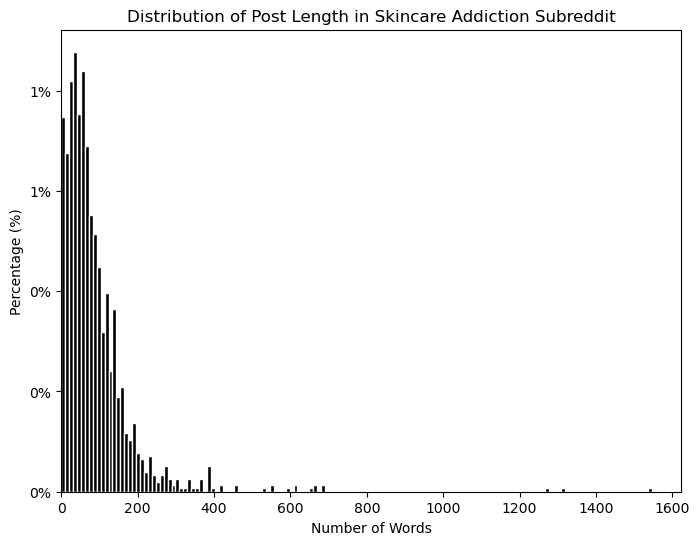

In [82]:
skin_add['selftext_words'] = [len(str(i).split()) for i in skin_add['self_text']]

plt.figure(figsize=(8, 6))
plt.hist(skin_add['selftext_words'], bins=150, color='black', edgecolor='white', density=True)
plt.title('Distribution of Post Length in Skincare Addiction Subreddit')
plt.xlabel('Number of Words')
plt.ylabel('Percentage (%)')

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:.0%}'.format(x)))

ax = plt.gca()
ax.set_xlim(left=0)

plt.show()

While there is some outliers in the data, I decided to keep them in because there is more than one which would be intresting to further explore why there is a group of post lengths that tend to be longer.

In [86]:
mean_selftext_len = skin_add['selftext_len'].mean()
print(f"The mean of 'selftext_len' is: {mean_selftext_len:.2f}")

# Find the mean of 'selftext_words'
mean_selftext_words = skin_add['selftext_words'].mean()
print(f"The mean of 'selftext_words' is: {mean_selftext_words:.2f}")

The mean of 'selftext_len' is: 490.85
The mean of 'selftext_words' is: 88.11


Mean of posts for skincare addiction subreddit. Both lengths and words are higher means than korean skincare subreddit.

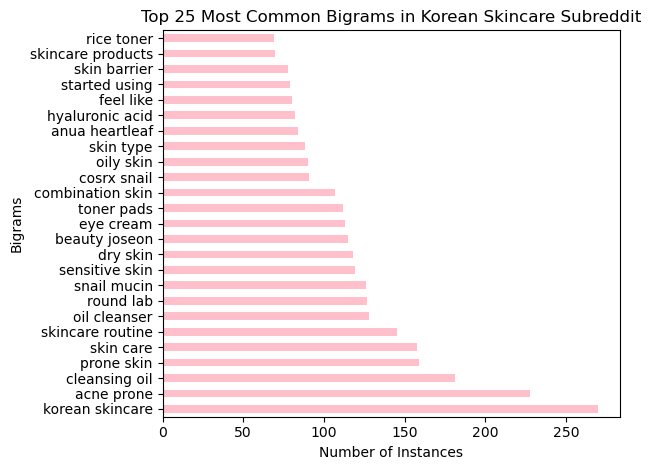

In [89]:
k_skin = k_skin.fillna('') 


english_stop_words = list(CountVectorizer(stop_words='english').get_stop_words())
custom_stop_words = ['ve', 'just', 'little', 'don', 'pjpg', 'auto', 'webp', 'format', 'https', 'preview', 'redd']


stop_words = english_stop_words + custom_stop_words

cvec_bi = CountVectorizer(stop_words=list(stop_words), ngram_range=(2, 2))
cvec_bi.fit(k_skin['self_text'])

x_cvect = cvec_bi.transform(k_skin['self_text'])
bi_df = pd.DataFrame(x_cvect.todense(), columns=cvec_bi.get_feature_names_out())


bi_df = bi_df.loc[:, (bi_df != 0).any(axis=0)]


bi_df_sorted = bi_df.sum().sort_values(ascending=False)


bi_df_sorted.head(25).plot(kind='barh', color='pink')


plt.title('Top 25 Most Common Bigrams in Korean Skincare Subreddit')
plt.xlabel('Number of Instances')
plt.ylabel('Bigrams')


plt.tight_layout()

# Display the plot
plt.show()

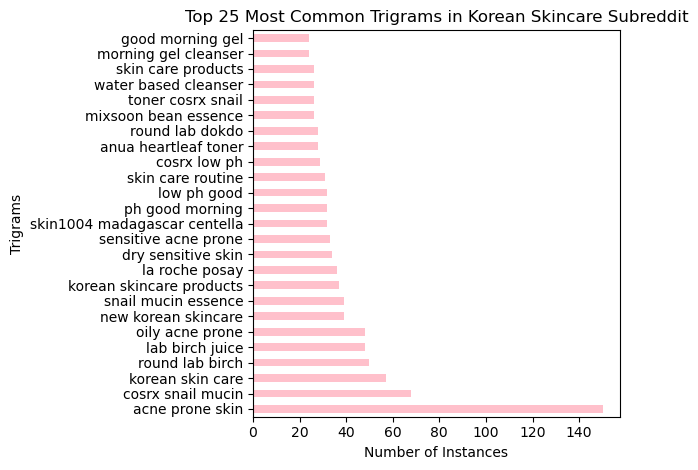

In [91]:
k_skin = k_skin.fillna('') 


english_stop_words = list(CountVectorizer(stop_words='english').get_stop_words())
custom_stop_words = ['ve', 'just', 'little', 'don', 'pjpg', 'auto', 'webp', 'format', 'https', 'preview', 'redd']


stop_words = english_stop_words + custom_stop_words


cvec_tri = CountVectorizer(stop_words=list(stop_words), ngram_range=(3, 3))
cvec_tri.fit(k_skin['self_text'])

x_cvect = cvec_tri.transform(k_skin['self_text'])
tri_df = pd.DataFrame(x_cvect.todense(), columns=cvec_tri.get_feature_names_out())

tri_df = tri_df.loc[:, (tri_df != 0).any(axis=0)]


tri_df_sorted = tri_df.sum().sort_values(ascending=False)


tri_df_sorted.head(25).plot(kind='barh', color='pink')


plt.title('Top 25 Most Common Trigrams in Korean Skincare Subreddit')
plt.xlabel('Number of Instances')
plt.ylabel('Trigrams')

plt.tight_layout()


plt.show()

Bigram for Skincare Addiction Subreddit 

In [51]:
cvec_bi_ski = CountVectorizer(stop_words=list(stop_words), ngram_range=(2, 2))
cvec_bi_ski.fit(skin_add['self_text'])

x_cvect = cvec_bi_ski.transform(skin_add['self_text'])

/opt/anaconda3/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['auto', 'format', 'https', 'pjpg', 'preview', 'redd', 'webp'] not in stop_words.
  warnings.warn(


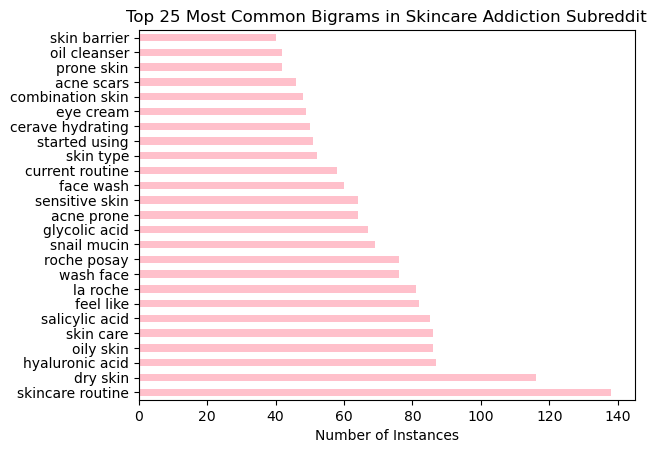

In [52]:
bi_df_sk = pd.DataFrame(x_cvect.todense(), columns=cvec_bi_ski.get_feature_names_out())
bi_df_sk.sum().sort_values(ascending=False).head(25).plot(kind='barh', color='pink')
plt.title('Top 25 Most Common Bigrams in Skincare Addiction Subreddit')
plt.xlabel('Number of Instances')
plt.show()

Trigram for Skincare Addiction Subreddit

In [53]:
cvec_tri_ad = CountVectorizer(stop_words=list(stop_words), ngram_range=(3, 3))
cvec_tri_ad.fit(skin_add['self_text'])

/opt/anaconda3/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['auto', 'format', 'https', 'pjpg', 'preview', 'redd', 'webp'] not in stop_words.
  warnings.warn(


CountVectorizer(ngram_range=(3, 3),
                stop_words=['off', 'sometimes', 'through', 'can', 'though',
                            'their', 'or', 'even', 'then', 'why',
                            'nevertheless', 'along', 'into', 'thereafter',
                            'namely', 'nothing', 'side', 'whom', 'than',
                            'between', 'afterwards', 'not', 'formerly', 'being',
                            'call', 'since', 'against', 'etc', 'whatever',
                            'name', ...])

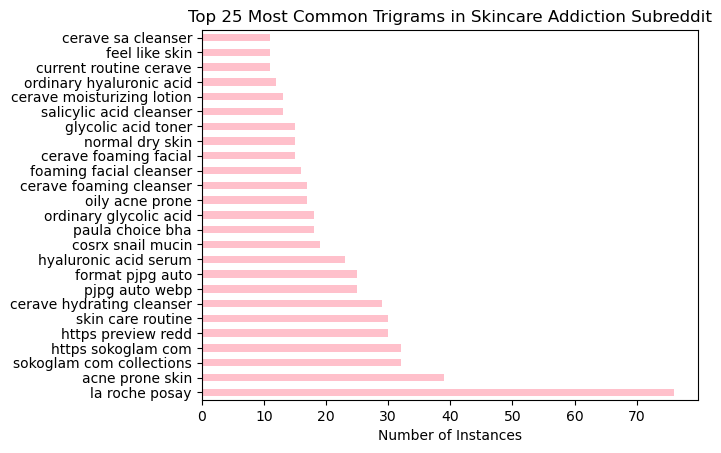

In [55]:
x_cvect = cvec_tri_ad.transform(skin_add['self_text'])
tri_df_f = pd.DataFrame(x_cvect.todense(), columns=cvec_tri_ad.get_feature_names_out())
tri_df_f.sum().sort_values(ascending=False).head(25).plot(kind='barh', color='pink')
plt.title('Top 25 Most Common Trigrams in Skincare Addiction Subreddit')
plt.xlabel('Number of Instances')
plt.show()

### Model 1

Baseline

In [57]:
y_test.value_counts(normalize= True)
#the baseline for this model is 50%----beat this 
#classes

subreddit
koreanskincare        0.521825
Skincare_Addiction    0.478175
Name: proportion, dtype: float64

The baseline for this model is ~ 50% since it is the most common class in the test data, my goal is to beat the baseline accuracy score.

The first model is Logistic Regression with Count Vectorizer, Tfidf, default settings.

In [92]:
log_pipe = Pipeline([
    ('cvect', CountVectorizer(max_features=10_000, stop_words=['stop_words'])),
    ('tfidf', TfidfTransformer()),
    ('log_reg', LogisticRegression(max_iter=10_000))
])

In [93]:
log_pipe.fit(X_train, y_train)

Pipeline(steps=[('cvect',
                 CountVectorizer(max_features=10000,
                                 stop_words=['stop_words'])),
                ('tfidf', TfidfTransformer()),
                ('log_reg', LogisticRegression(max_iter=10000))])

In [94]:
log_pipe.score(X_train, y_train)

0.8980132450331125

In [95]:
log_pipe.score(X_test, y_test)

0.7559523809523809

Results for first model.

Searching with Gridsearch and specific hyperparameters.

In [96]:
params = {
    'cvect__max_df': (0.5, 0.75, 1.0),
    'cvect__min_df': (1, 2, 3),
    'cvect__ngram_range': ((1, 1), (1, 2), (1, 3)),
    'log_reg__C': [0.1, 1, 10],
    'log_reg__penalty': ['l2']
}

gs = GridSearchCV(log_pipe, param_grid=params, cv=5, n_jobs=-1)

In [97]:
gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvect',
                                        CountVectorizer(max_features=10000,
                                                        stop_words=['stop_words'])),
                                       ('tfidf', TfidfTransformer()),
                                       ('log_reg',
                                        LogisticRegression(max_iter=10000))]),
             n_jobs=-1,
             param_grid={'cvect__max_df': (0.5, 0.75, 1.0),
                         'cvect__min_df': (1, 2, 3),
                         'cvect__ngram_range': ((1, 1), (1, 2), (1, 3)),
                         'log_reg__C': [0.1, 1, 10],
                         'log_reg__penalty': ['l2']})

In [98]:
y_pred = gs.predict(X_test)
y_pred 

array(['Skincare_Addiction', 'koreanskincare', 'koreanskincare',
       'Skincare_Addiction', 'Skincare_Addiction', 'Skincare_Addiction',
       'Skincare_Addiction', 'koreanskincare', 'Skincare_Addiction',
       'koreanskincare', 'Skincare_Addiction', 'Skincare_Addiction',
       'Skincare_Addiction', 'Skincare_Addiction', 'koreanskincare',
       'Skincare_Addiction', 'Skincare_Addiction', 'koreanskincare',
       'Skincare_Addiction', 'Skincare_Addiction', 'Skincare_Addiction',
       'Skincare_Addiction', 'koreanskincare', 'Skincare_Addiction',
       'Skincare_Addiction', 'Skincare_Addiction', 'koreanskincare',
       'Skincare_Addiction', 'koreanskincare', 'Skincare_Addiction',
       'koreanskincare', 'Skincare_Addiction', 'koreanskincare',
       'koreanskincare', 'Skincare_Addiction', 'koreanskincare',
       'Skincare_Addiction', 'Skincare_Addiction', 'Skincare_Addiction',
       'Skincare_Addiction', 'koreanskincare', 'koreanskincare',
       'koreanskincare', 'koreanskinca

In [99]:
gs.get_params()

{'cv': 5,
 'error_score': nan,
 'estimator__memory': None,
 'estimator__steps': [('cvect',
   CountVectorizer(max_features=10000, stop_words=['stop_words'])),
  ('tfidf', TfidfTransformer()),
  ('log_reg', LogisticRegression(max_iter=10000))],
 'estimator__verbose': False,
 'estimator__cvect': CountVectorizer(max_features=10000, stop_words=['stop_words']),
 'estimator__tfidf': TfidfTransformer(),
 'estimator__log_reg': LogisticRegression(max_iter=10000),
 'estimator__cvect__analyzer': 'word',
 'estimator__cvect__binary': False,
 'estimator__cvect__decode_error': 'strict',
 'estimator__cvect__dtype': numpy.int64,
 'estimator__cvect__encoding': 'utf-8',
 'estimator__cvect__input': 'content',
 'estimator__cvect__lowercase': True,
 'estimator__cvect__max_df': 1.0,
 'estimator__cvect__max_features': 10000,
 'estimator__cvect__min_df': 1,
 'estimator__cvect__ngram_range': (1, 1),
 'estimator__cvect__preprocessor': None,
 'estimator__cvect__stop_words': ['stop_words'],
 'estimator__cvect__str

In [103]:
gs.best_params_

{'cvect__max_df': 0.75,
 'cvect__min_df': 1,
 'cvect__ngram_range': (1, 2),
 'log_reg__C': 1,
 'log_reg__penalty': 'l2'}

In [104]:
gs.score(X_train, y_train)

0.9271523178807947

In [105]:
gs.score(X_test, y_test)

0.7440476190476191

In [106]:
#Compared to the original

In [107]:
log_pipe.score(X_train, y_train)

0.8980132450331125

In [108]:
log_pipe.score(X_test, y_test)

0.7559523809523809

In [109]:
print("Best parameters set found on development set:")
print(gs.best_params_)
print("Best score found:")
print(gs.best_score_)

Best parameters set found on development set:
{'cvect__max_df': 0.75, 'cvect__min_df': 1, 'cvect__ngram_range': (1, 2), 'log_reg__C': 1, 'log_reg__penalty': 'l2'}
Best score found:
0.7562913907284768


### Evaluation for Model 1 : Logistic regression

In [110]:
#Confusion matrix 

In [111]:
from sklearn.metrics import confusion_matrix

In [112]:
preds = log_pipe.predict(X_test)
confusion_matrix(y_test, preds)

array([[192,  49],
       [ 74, 189]])

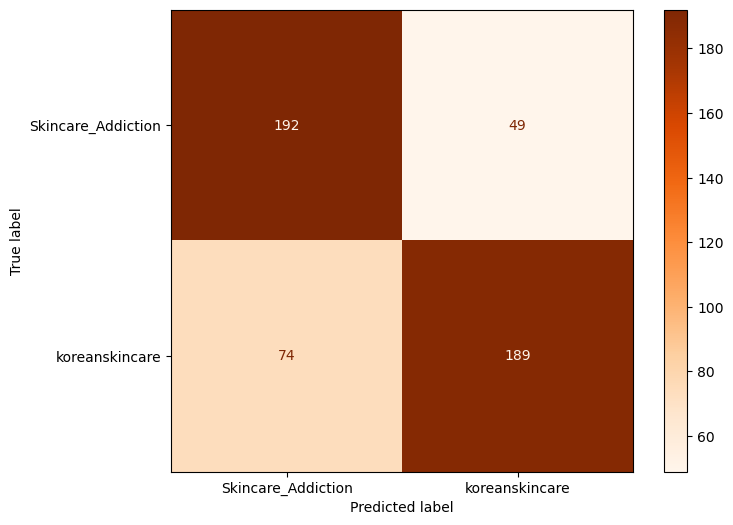

In [113]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay.from_estimator(log_pipe, X_test, y_test, cmap='Oranges', ax=ax);

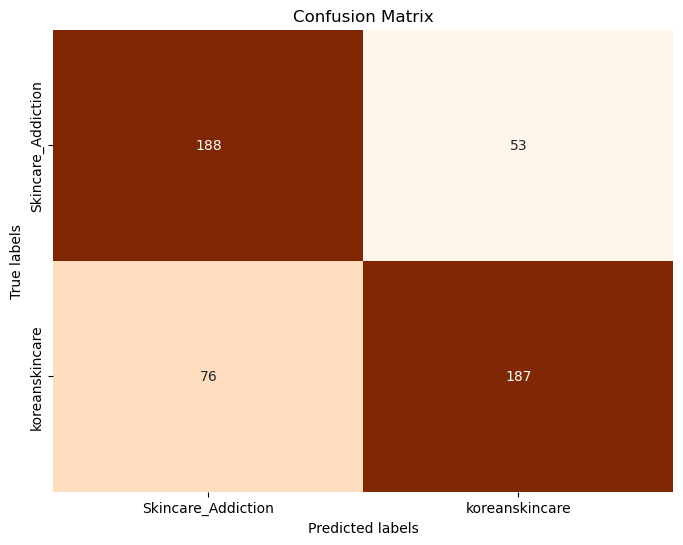

In [115]:
from sklearn.metrics import confusion_matrix

class_labels = y_test.unique()

cm = confusion_matrix(y_test, y_pred,labels=class_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', cbar=False,xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [116]:
print(classification_report(y_test, preds, digits = 5))

                    precision    recall  f1-score   support

Skincare_Addiction    0.72180   0.79668   0.75740       241
    koreanskincare    0.79412   0.71863   0.75449       263

          accuracy                        0.75595       504
         macro avg    0.75796   0.75766   0.75594       504
      weighted avg    0.75954   0.75595   0.75588       504



Can predict correctly ~76% of the time.

In [117]:
preds = log_pipe.predict(X_test)

In [118]:
misclassified_ = (preds != y_test)

In [119]:
misclassified_

1198    False
526     False
393     False
1407    False
433      True
        ...  
757      True
771     False
1366    False
408     False
1625    False
Name: subreddit, Length: 504, dtype: bool

In [120]:
mis_df = pd.DataFrame({
    'Misclassified_Posts': X_test[misclassified_],
    'True Labels': y_test[misclassified_],
    'Predicted_Labels': preds[misclassified_]
})

In [121]:
mis_df.count()

Misclassified_Posts    123
True Labels            123
Predicted_Labels       123
dtype: int64

In [122]:
mis_df.head(n=25)

,Misclassified_Posts,True Labels,Predicted_Labels
433,not really related but i need some help on thi...,koreanskincare,Skincare_Addiction
678,Mini haul of what I got from OliveYoung :) gon...,koreanskincare,Skincare_Addiction
462,Are these red spots I have PIE (post inflammat...,koreanskincare,Skincare_Addiction
1395,"Hello, I am a 28 female and currently using a ...",Skincare_Addiction,koreanskincare
774,My skin is mainly dry (between my brow area an...,koreanskincare,Skincare_Addiction
56,Hiya guys! I'm trying to find new recommendati...,koreanskincare,Skincare_Addiction
519,"Recently, I had a decent sized pimple on my ch...",koreanskincare,Skincare_Addiction
1524,I have been using skincare products since I ca...,Skincare_Addiction,koreanskincare
1860,"If it’s not all 3, are there any that double a...",Skincare_Addiction,koreanskincare
1475,Do you prefer to use a cleansing balm or a cle...,Skincare_Addiction,koreanskincare


In [123]:
mis_df.count()

Misclassified_Posts    123
True Labels            123
Predicted_Labels       123
dtype: int64

Text(0.5, 1.0, 'Misclassified posts')

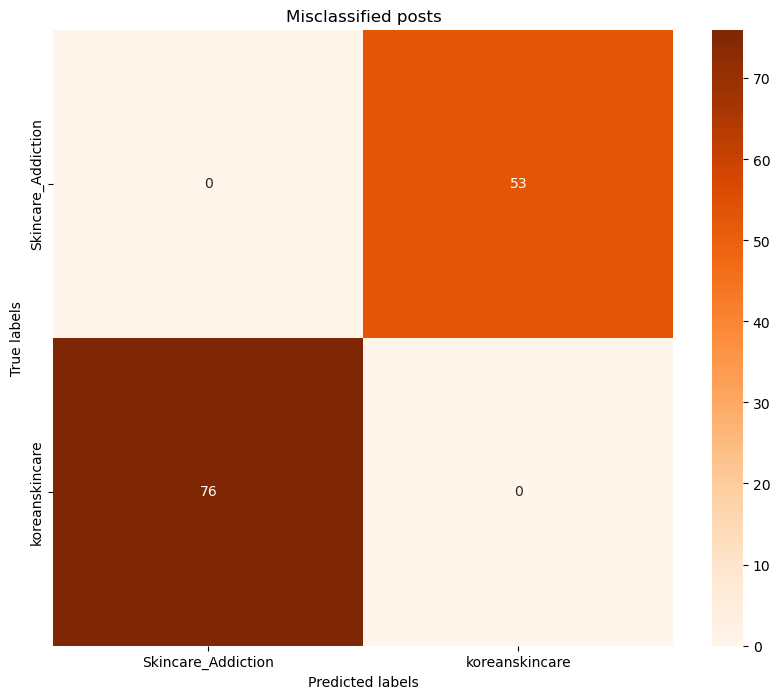

In [124]:
inc = cm.copy()
np.fill_diagonal(inc, 0)
incorrect_cm = inc

plt.figure(figsize=(10, 8))
sns.heatmap(incorrect_cm, annot=True, fmt='d', cmap='Oranges', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Misclassified posts')

In [ ]:
In the misclassified posts you can see that there are 

### Models 2,3 and 4(grouped)

In [125]:
#Model 2: Cvect + Random Forest ---bagged?
#Model 3: : Tfidf + Naive Bayes 

In [133]:
# Define the custom stop words
english_stop_words = list(CountVectorizer(stop_words='english').get_stop_words())
custom_stop_words = ['ve', 'just', 'little', 'don', 'pjpg', 'auto', 'webp', 'format', 'https', 'preview', 'redd']

# Combine English stop words and custom stop words
stop_words = english_stop_words + custom_stop_words

model_class_pipe = {
    'K-Nearest Neighbors Classifier': Pipeline([
        ('vectorizer', CountVectorizer(stop_words=stop_words)),
        ('classifier', KNeighborsClassifier())
    ]),
    'Random Forest Classifier': Pipeline([
        ('vectorizer', CountVectorizer(stop_words=stop_words)),
        ('classifier', RandomForestClassifier())
    ]),
    'Naive Bayes': Pipeline([
        ('vectorizer', CountVectorizer(stop_words=stop_words)),
        ('classifier', MultinomialNB())
    ]),
}

for name, model in model_class_pipe.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred)
    print(f"Classification Report for {name}:")
    print(report)
    print()

Classification Report for K-Nearest Neighbors Classifier:
                    precision    recall  f1-score   support

Skincare_Addiction       0.53      0.72      0.61       241
    koreanskincare       0.62      0.43      0.51       263

          accuracy                           0.57       504
         macro avg       0.58      0.57      0.56       504
      weighted avg       0.58      0.57      0.56       504


Classification Report for Random Forest Classifier:
                    precision    recall  f1-score   support

Skincare_Addiction       0.75      0.78      0.77       241
    koreanskincare       0.79      0.76      0.78       263

          accuracy                           0.77       504
         macro avg       0.77      0.77      0.77       504
      weighted avg       0.77      0.77      0.77       504


Classification Report for Naive Bayes:
                    precision    recall  f1-score   support

Skincare_Addiction       0.79      0.72      0.75       241
  

### Feature Importance 

In [95]:
 # Get the feature importance
feature_importances = np.abs(model.feature_log_prob_)
feature_names = vectorizer.get_feature_names_out()
        
# Sort the feature importances in descending order
sorted_importances = np.argsort(feature_importances, axis=1)[:, ::-1]
        
# Print the top 10 most important features
for i in range(2):
     print(f"Top 10 features for class {i}:")
     print(", ".join([feature_names[idx] for idx in sorted_importances[i][:10]]))
     print()

Top 10 features for class 0:
화장품책임판매업자, gokujun, goals, glyco, gluten, scenic, glorious, globally, global, glint

Top 10 features for class 1:
00, deathly, pyunkangyul, deactivating, dead, pyulkang, death, pustules, hefty, puss



Naive Bayes Train Score: 0.91
Naive Bayes Test Score: 0.76


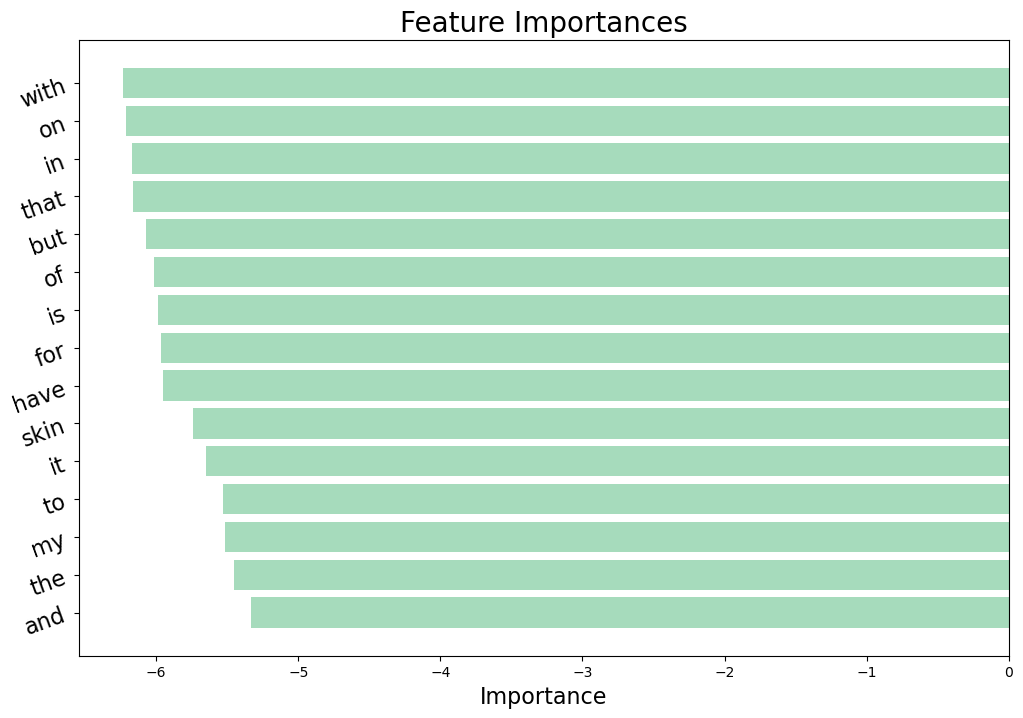

In [97]:
model_class_pipe = {
    'Naive Bayes': MultinomialNB(),
}


vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

for model_name, model in model_class_pipe.items():
    if model_name == 'Naive Bayes':
        model.fit(X_train_vectorized, y_train)
        train_score = model.score(X_train_vectorized, y_train)
        test_score = model.score(X_test_vectorized, y_test)
        print(f"{model_name} Train Score: {train_score:.2f}")
        print(f"{model_name} Test Score: {test_score:.2f}")

        
        feature_importances = model.feature_log_prob_
        feature_names = vectorizer.get_feature_names_out()


        importance_df = pd.DataFrame({
            'feature': feature_names,
            'importance': feature_importances.mean(axis=0)
        })

       
        importance_df = importance_df.sort_values(by='importance', ascending=False).head(15)

    
        plt.figure(figsize=(12, 8))
        plt.barh(importance_df['feature'], importance_df['importance'], color='#a6dbbc')
        plt.xlabel('Importance', fontsize=16)
        plt.yticks(rotation=20, fontsize=16)
        plt.title('Feature Importances', fontsize=20)
        plt.show()

### Result